In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [36]:
#load data
df = pd.read_csv("C:/Users/VICTUS/Dropbox/DataBank/credit_score_data.csv")
print(df.info())
df.describe()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                12000 non-null  int64 
 1   Gender             12000 non-null  object
 2   Education          12000 non-null  object
 3   Income             12000 non-null  int64 
 4   Debt               12000 non-null  int64 
 5   Credit_Score       12000 non-null  int64 
 6   Loan_Amount        12000 non-null  int64 
 7   Loan_Term          12000 non-null  int64 
 8   Num_Credit_Cards   12000 non-null  int64 
 9   Payment_History    12000 non-null  object
 10  Employment_Status  12000 non-null  object
 11  Residence_Type     12000 non-null  object
 12  Marital_Status     12000 non-null  object
 13  Creditworthiness   12000 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 1.3+ MB
None


,Age,Income,Debt,Credit_Score,Loan_Amount,Loan_Term,Num_Credit_Cards,Creditworthiness
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,43.489250,85222.009417,25354.673250,573.967583,25113.951250,35.943000,4.985833,0.702583
std,14.908982,37640.043409,14087.390846,157.816052,14247.092051,16.965162,2.593458,0.457140
min,18.000000,20026.000000,1001.000000,300.000000,501.000000,12.000000,1.000000,0.000000
25%,31.000000,52400.750000,13161.000000,437.000000,12725.000000,24.000000,3.000000,0.000000
50%,43.000000,85756.000000,25382.500000,574.000000,25220.500000,36.000000,5.000000,1.000000
75%,56.000000,117754.750000,37497.500000,709.000000,37348.000000,48.000000,7.000000,1.000000
max,69.000000,149984.000000,49995.000000,849.000000,49996.000000,60.000000,9.000000,1.000000


In [37]:
print(df.head())
df['Creditworthiness'].nunique()


   Age  Gender    Education  Income   Debt  Credit_Score  Loan_Amount  \
0   56  Female       Master  149406  34089           581        49200   
1   69  Female  High School   78896   8626           648        20147   
2   46  Female       Master  119339  46281           329        41307   
3   32    Male  High School  131067  29403           816        19019   
4   60    Male          PhD   38001  30032           673        16317   

   Loan_Term  Num_Credit_Cards Payment_History Employment_Status  \
0         60                 4             Bad        Unemployed   
1         24                 7            Good          Employed   
2         12                 8             Bad        Unemployed   
3         60                 8             Bad          Employed   
4         36                 4         Average          Employed   

  Residence_Type Marital_Status  Creditworthiness  
0         Rented         Single                 1  
1      Mortgaged        Married                 

2

In [38]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])  
# Male=1, Female=0


In [39]:
edu_map = {"High School": 1, "Bachelor": 2, "Master": 3, "PhD": 4}
df["Education"] = df["Education"].map(edu_map)

df.drop(['Education'], axis=1, inplace=True)
df.head()
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                12000 non-null  int64 
 1   Gender             12000 non-null  int64 
 2   Income             12000 non-null  int64 
 3   Debt               12000 non-null  int64 
 4   Credit_Score       12000 non-null  int64 
 5   Loan_Amount        12000 non-null  int64 
 6   Loan_Term          12000 non-null  int64 
 7   Num_Credit_Cards   12000 non-null  int64 
 8   Payment_History    12000 non-null  object
 9   Employment_Status  12000 non-null  object
 10  Residence_Type     12000 non-null  object
 11  Marital_Status     12000 non-null  object
 12  Creditworthiness   12000 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.2+ MB
None


,Age,Gender,Income,Debt,Credit_Score,Loan_Amount,Loan_Term,Num_Credit_Cards,Creditworthiness
count,12000.000000,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,43.489250,0.49900,85222.009417,25354.673250,573.967583,25113.951250,35.943000,4.985833,0.702583
std,14.908982,0.50002,37640.043409,14087.390846,157.816052,14247.092051,16.965162,2.593458,0.457140
min,18.000000,0.00000,20026.000000,1001.000000,300.000000,501.000000,12.000000,1.000000,0.000000
25%,31.000000,0.00000,52400.750000,13161.000000,437.000000,12725.000000,24.000000,3.000000,0.000000
50%,43.000000,0.00000,85756.000000,25382.500000,574.000000,25220.500000,36.000000,5.000000,1.000000
75%,56.000000,1.00000,117754.750000,37497.500000,709.000000,37348.000000,48.000000,7.000000,1.000000
max,69.000000,1.00000,149984.000000,49995.000000,849.000000,49996.000000,60.000000,9.000000,1.000000


In [40]:
pay_map = {"Bad": 0, "Average": 1, "Good": 2}
df["Payment_History"] = df["Payment_History"].map(pay_map)


In [41]:
df = pd.get_dummies(df, columns=["Employment_Status"], drop_first=True)


In [42]:
res_map = {"Rented": 0, "Owned": 1, "Mortgaged": 2}
df["Residence_Type"] = df["Residence_Type"].map(res_map)


In [43]:
mar_map = {"Single": 0, "Married": 1, "Divorced": 2}
df["Marital_Status"] = df["Marital_Status"].map(mar_map)


In [44]:
print(df.head())
x = df.drop(columns=['Creditworthiness'])
y = df['Creditworthiness']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


   Age  Gender  Income   Debt  Credit_Score  Loan_Amount  Loan_Term  \
0   56       0  149406  34089           581        49200         60   
1   69       0   78896   8626           648        20147         24   
2   46       0  119339  46281           329        41307         12   
3   32       1  131067  29403           816        19019         60   
4   60       1   38001  30032           673        16317         36   

   Num_Credit_Cards  Payment_History  Residence_Type  Marital_Status  \
0                 4                0               0               0   
1                 7                2               2               1   
2                 8                0               1               0   
3                 8                0               1               0   
4                 4                1               0               1   

   Creditworthiness  Employment_Status_Self-Employed  \
0                 1                            False   
1                 1         

In [45]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = RandomForestClassifier(random_state=42)
# model = LogisticRegression()
model.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [46]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(cm)



Accuracy: 0.6970833333333334
Recall: 0.9887173396674585
Precision: 0.7016434892541087
F1 Score: 0.8208035494207543
Confusion Matrix:
[[   8  708]
 [  19 1665]]


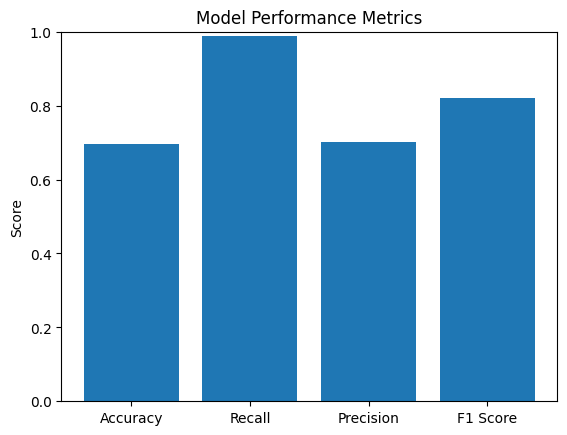

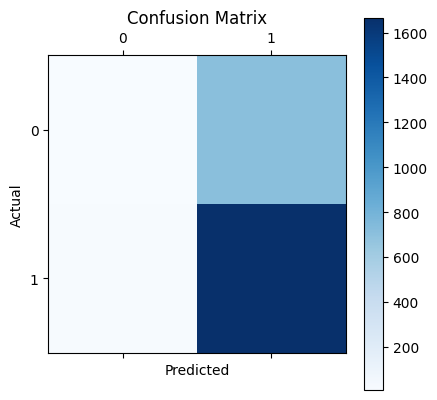

In [47]:
#plot accuracy, recall, precision, f1 score, confusion matrix
metrics = {'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'F1 Score': f1}
plt.bar(metrics.keys(), metrics.values())
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()
plt.matshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [48]:
# model weights save and load
import joblib
joblib.dump(model, 'logistic_regression_model.pkl')
loaded_model = joblib.load('logistic_regression_model.pkl')
y_loaded_pred = loaded_model.predict(x_test)
loaded_accuracy = accuracy_score(y_test, y_loaded_pred)
print(f"Loaded Model Accuracy: {loaded_accuracy}")


Loaded Model Accuracy: 0.6970833333333334


In [49]:
print(df.head()) 
#save scaler
joblib.dump(scaler, 'scaler.pkl')
#load scaler




   Age  Gender  Income   Debt  Credit_Score  Loan_Amount  Loan_Term  \
0   56       0  149406  34089           581        49200         60   
1   69       0   78896   8626           648        20147         24   
2   46       0  119339  46281           329        41307         12   
3   32       1  131067  29403           816        19019         60   
4   60       1   38001  30032           673        16317         36   

   Num_Credit_Cards  Payment_History  Residence_Type  Marital_Status  \
0                 4                0               0               0   
1                 7                2               2               1   
2                 8                0               1               0   
3                 8                0               1               0   
4                 4                1               0               1   

   Creditworthiness  Employment_Status_Self-Employed  \
0                 1                            False   
1                 1         

['scaler.pkl']